In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import linprog
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint

Max z = 5x1+4x2

Subject to

6x1+4x2<=24

x1+2x2<=6

x2-x1<=1

x2<=2

x1,x2>=0

In [65]:
linear_constraint = LinearConstraint([[6, 4], [1, 2], [-1, 2], [0,1]], [-np.inf,1,-np.inf,1], [24, 6, 1, 2])

In [66]:
def fun(x):
    c =np.array([5, 4])
    return np.dot(c, x)

In [67]:
x0 = (0, 24)
result = minimize(fun, x0, constraints=linear_constraint)

In [68]:
print('Solution is: ', result.x)
print('optimal value is: ', result.fun)

Solution is:  [1. 1.]
optimal value is:  8.999999999999321


In [69]:
f = lambda x: 5*x[0]+4*x[1]
cons = ({'type': 'ineq','fun': lambda x: -6*x[0]-4*x[1]+24}, # All constraints are greater than type
        {'type': 'ineq','fun': lambda x: -x[0]-2*x[1]+6},
        {'type': 'ineq','fun': lambda x: x[0]-x[1]+1},
        {'type': 'ineq','fun': lambda x: -x[1]+2}
        )
cons2 = ({'type': 'eq','fun': lambda x: -6*x[0]-4*x[1]+24}, # All constraints are greater than type
        {'type': 'eq','fun': lambda x: -x[0]-2*x[1]+6},
        {'type': 'eq','fun': lambda x: x[0]-x[1]+1}, 
        {'type': 'eq','fun': lambda x: -x[1]+2} 
        )

bnds = ((0,None),(0,None)) 

X0 = (2,0)
res = minimize(f,X0, bounds=bnds, constraints= cons)

In [70]:
res2 = minimize(f,X0)
res2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -3874580521813.1895
        x: [-4.725e+11 -3.780e+11]
      nit: 3
      jac: [ 5.000e+00  4.000e+00]
 hess_inv: [[-1.476e+11 -1.181e+11]
            [-1.181e+11 -9.446e+10]]
     nfev: 393
     njev: 127

In [71]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0
       x: [ 0.000e+00  0.000e+00]
     nit: 2
     jac: [ 5.000e+00  4.000e+00]
    nfev: 6
    njev: 2

In [72]:
res3 = minimize(f,X0,bounds=bnds,constraints=cons)

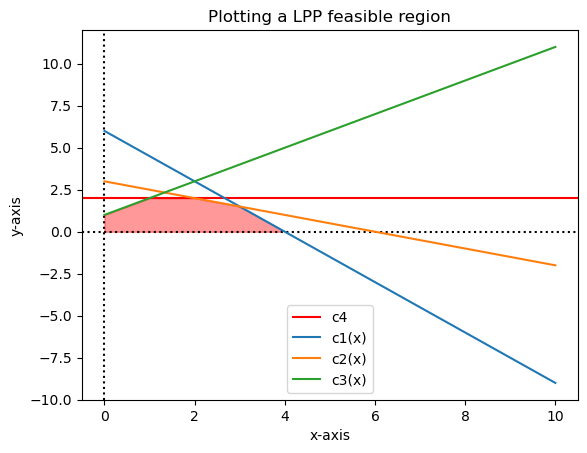

In [73]:
f = lambda x: -5*x/4
c1 = lambda x: 6 - 1.5*x
c2 = lambda x: 3 - 0.5*x
c3 = lambda x: 1 + x
c4 = 2

x = np.linspace(0,10,100)

plt.axhline(y=0,color='black',linestyle=':')
plt.axhline(y=2,color='red',linestyle='-',label='c4')
plt.axvline(x=0,color='black',linestyle=':')

plt.plot(x,c1(x),label='c1(x)')
plt.plot(x,c2(x),label='c2(x)')
plt.plot(x,c3(x),label='c3(x)')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.title("Plotting a LPP feasible region")

y1 = np.minimum(c2(x),c3(x))
y1 = np.minimum(y1,c4)
y1 = np.minimum(y1,c1(x))

plt.fill_between(x,y1,where=(y1>=0),color='red',alpha=0.4)
plt.show()